In [50]:
import pandas as pd # dataframe manipulation
import numpy as np # array manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [51]:
train=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [52]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [53]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [54]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [ ]:
# Exploratory Data Analysis

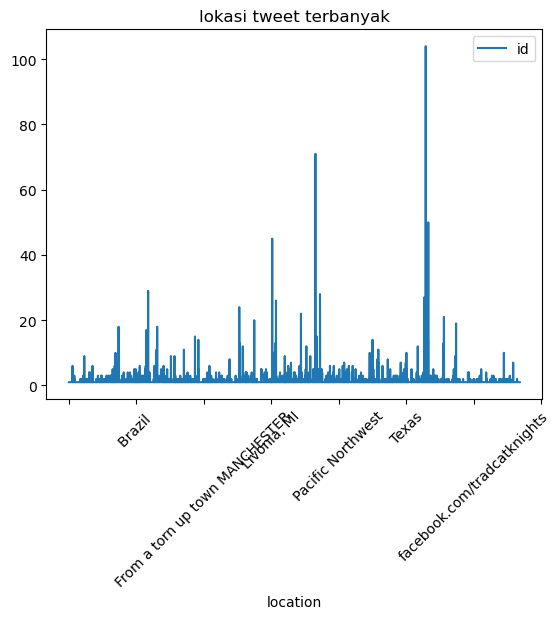

In [55]:
train.groupby("location").count()[["id"]].plot()
plt.xticks(rotation=45)
plt.title("lokasi tweet terbanyak")
plt.show()


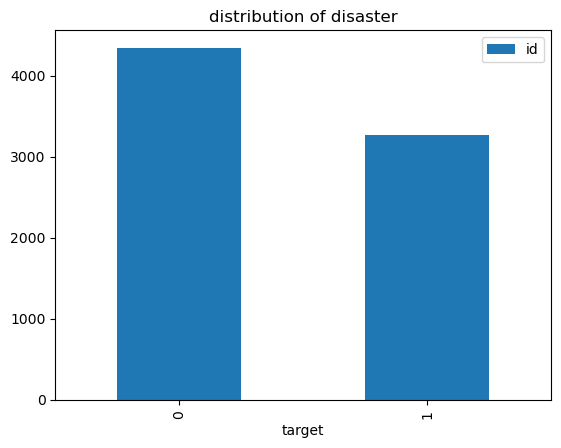

In [56]:
train.groupby(["target"])[["id"]].count().plot(kind="bar")
plt.title("distribution of disaster")
plt.show()

In [57]:
from wordcloud import WordCloud # digunakan untuk word manipulation

In [58]:
allWords = ' '.join([twts for twts in train['text']])
allWords[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

In [59]:
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110)\
                    .generate(allWords)

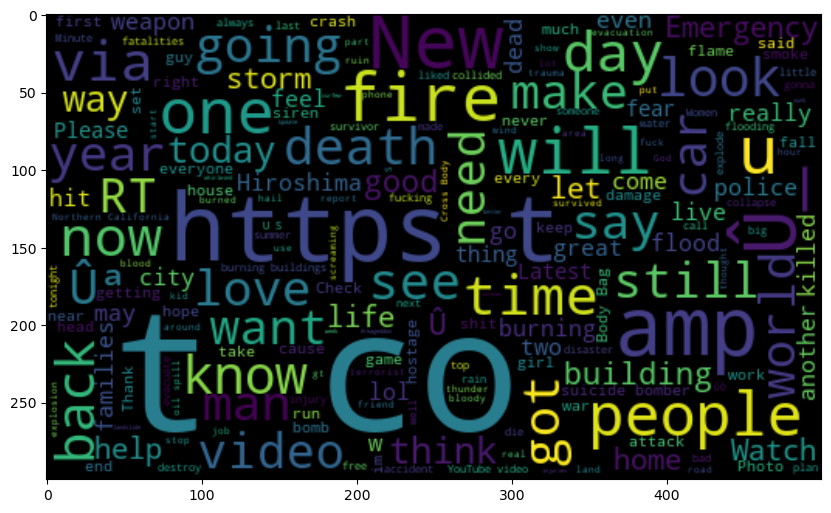

In [60]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

In [61]:
word_freq = WordCloud(width=500, height=300, max_font_size=110).process_text(allWords)

In [62]:
list_word = []
freq = []
for key, items in word_freq.items():
    list_word.append(key)
    freq.append(items)
df_words = pd.DataFrame({'Words':list_word, 'Freq':freq})
df_words.sort_values(['Freq'],ascending=False,inplace=True)
df_words.head(10)

,Words,Freq
19295,t co,4717
19305,https t,410
295,amp,303
138,New,259
268,Û_,247
6,fire,209
650,u,197
141,will,185
557,one,185
20,people,166


<AxesSubplot:xlabel='Freq', ylabel='Words'>

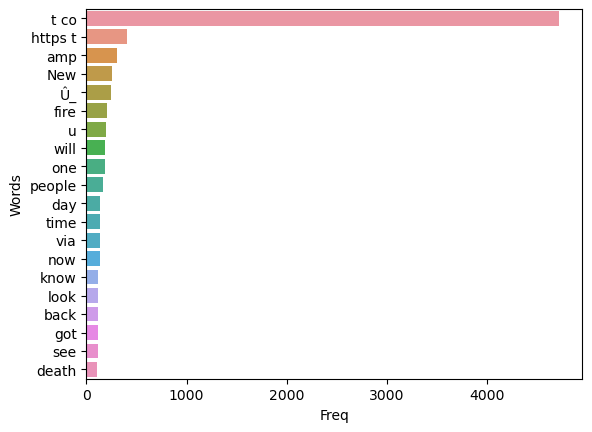

In [63]:
sns.barplot(data=df_words.head(20), x='Freq', y='Words')

In [ ]:
# Data Preprocessing

In [64]:
X = train["text"].copy()
y = train["target"].copy()

In [ ]:
## Data Cleaning

In [65]:
import re # regex digunakan untuk text manipulation

In [66]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords # untuk ambil data stopwords
from nltk.stem.snowball import SnowballStemmer # untuk ambil kata dasar

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
stop_words = stopwords.words("english") # untuk ambil list kata penghubung di dalam bahasa inggris
stemmer = SnowballStemmer("english") # ambil list kata dasar bahasa inggris

In [68]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [69]:
def data_cleaner(text):
    text = text.lower()
    text = text.replace(":(","sad")
    text = text.replace(":)","happy")
    text = text.replace(":3","cute")
    text = text.replace(":d","laugh")
    text = text.replace(":-)","happy")
    text = text.replace(":=)","happy")
    text = text.replace(":'('","cry")
    
    text = ' '.join(stemmer.stem(txt) for txt in text.split()) # stemming
    text = ' '.join([word for word in text.split() if not word in stop_words]) # remove stopwords
    
    text = re.sub(r"http\S+"," ",text) # remove urls
    text = re.sub(r"<.*?>"," ",text) # remove html tags
    text = re.sub(r"(#\w+|@\w+)"," ",text) # remove hastags & mention
    text = re.sub(r"[^\w\s]"," ",text) # remove punctuations
    text = re.sub(r"\d+"," ",text) # remove digits
    text = re.sub(r"[^A-Za-z]"," ",text) # remove non-letters
    
    text = text.strip()
    
    return text

In [70]:
print("Before:")
print(X[0])
print("\n")
print("After:")
print(data_cleaner(X[0]))

Before:
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


After:
deed reason   may allah forgiv us


In [71]:
X_cleaned = X.apply(data_cleaner)
X_cleaned

0                       deed reason   may allah forgiv us
1                   forest fire near la rong sask  canada
2       resid ask shelter place notifi officers  evacu...
3                   peopl receiv   evacu order california
4               got sent photo rubi   smoke   pour school
                              ...                        
7608       two giant crane hold bridg collaps nearbi home
7609    control wild fire california even northern par...
7610                    m         utc   km volcano hawaii
7611    polic investig e bik collid car littl portugal...
7612    latest  home raze northern california wildfir ...
Name: text, Length: 7613, dtype: object

In [72]:
allWords1 = ' '.join([twts for twts in X_cleaned])
allWords1[:1000]

'deed reason   may allah forgiv us forest fire near la rong sask  canada resid ask shelter place notifi officers  evacu shelter place order expect peopl receiv   evacu order california got sent photo rubi   smoke   pour school updat    california hwy    close direct due lake counti fire heavi rain caus flash flood street manitou  colorado spring area i m top hill see fire woods emerg evacu happen build across street i m afraid tornado come area three peopl die heat wave far haha south tampa get flood hah  wait second live south tampa gonna gonna fvck days  i v lost count bago myanmar   arriv bago damag school bus   multi car crash man love fruit summer love car fast goooooooaaaaaal ridiculous london cool love ski wonder day looooool way   i can t eat shit nyc last week love girlfriend cooool happi like pasta end wholesal market ablaz alway tri bring heavy break news nigeria flag set ablaz aba cri more  set ablaz plus side look sky last night ablaz they v built much hype around new acqu

<AxesSubplot:xlabel='Freq', ylabel='Words'>

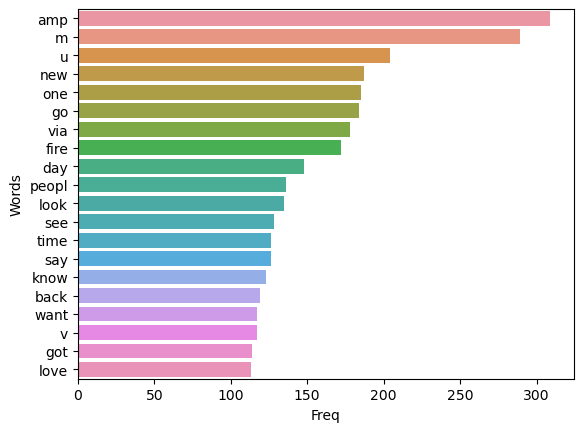

In [73]:
word_freq = WordCloud(width=500, height=300, max_font_size=110).process_text(allWords1)
list_word = []
freq = []
for key, items in word_freq.items():
    list_word.append(key)
    freq.append(items)
df_words = pd.DataFrame({'Words':list_word, 'Freq':freq})
df_words.sort_values(['Freq'],ascending=False,inplace=True)
df_words.head(10)
sns.barplot(data=df_words.head(20), x='Freq', y='Words')

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
##Tokenizing

In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
X_final = tokenizer.texts_to_sequences(X_cleaned)
vocab_size = len(tokenizer.word_index) + 1

print(f"Vocab Size: {vocab_size}")
print(f"Example:")
print(f"Sentences: {X_cleaned[1]}")
print("\n")

print(f"After tokenizing: {X_final[1]}")
print("\n")

X_fix_final = pad_sequences(X_final, padding="post")
print(f"After padding: {X_fix_final[1]}")

Vocab Size: 11152
Example:
Sentences: forest fire near la rong sask  canada


After tokenizing: [154, 4, 112, 657, 5178, 5179, 1200]


After padding: [ 154    4  112  657 5178 5179 1200    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [76]:
from sklearn.model_selection import train_test_split

In [ ]:
# Machine Learning Modeling

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_fix_final, y, test_size=0.2, random_state = 42)

In [78]:
print(X_train.shape, X_test.shape)

(6090, 23) (1523, 23)


In [79]:
import tensorflow as tf

In [80]:
epochs = 5
batch_size = 32
embedding_dim = 32
units = 64

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X_fix_final.shape[1]),
    tf.keras.layers.GRU(units),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

In [82]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy']
)

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23, 32)            356864    
                                                                 
 gru_1 (GRU)                 (None, 64)                18816     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 377,826
Trainable params: 377,826
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = epochs, 
                    batch_size = batch_size, 
                    validation_data=(X_test, y_test))

Epoch 1/5
191/191 [==============================] - 5s 15ms/step - loss: 0.6852 - accuracy: 0.5685 - val_loss: 0.6824 - val_accuracy: 0.5739
Epoch 2/5
191/191 [==============================] - 2s 13ms/step - loss: 0.5489 - accuracy: 0.7076 - val_loss: 0.4543 - val_accuracy: 0.7951
Epoch 3/5
191/191 [==============================] - 2s 13ms/step - loss: 0.3317 - accuracy: 0.8657 - val_loss: 0.4742 - val_accuracy: 0.7932
Epoch 4/5
191/191 [==============================] - 3s 13ms/step - loss: 0.2211 - accuracy: 0.9200 - val_loss: 0.5764 - val_accuracy: 0.7663
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.1505 - accuracy: 0.9493 - val_loss: 0.6323 - val_accuracy: 0.7525


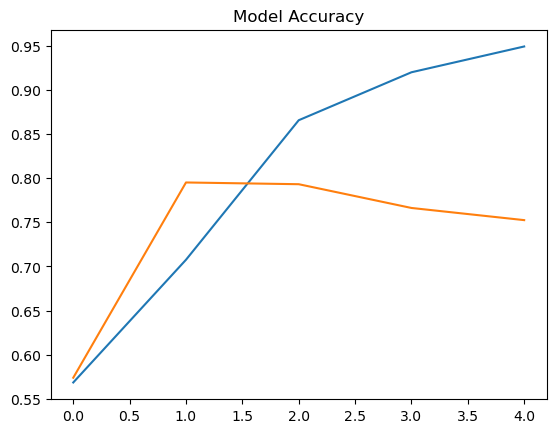

In [85]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Model Accuracy")
plt.show()

In [86]:
test["target"]=np.nan

In [87]:
X_backtest = test["text"].copy()
y_backtest = test['target'].copy()

X_backtest = X_backtest.apply(data_cleaner)
X_backtest = tokenizer.texts_to_sequences(X_backtest)
X_backtest = pad_sequences(X_backtest, padding='post', maxlen=X_fix_final.shape[1])


In [88]:
X_backtest.shape

(3263, 23)

In [89]:
y_pred = model.predict(X_backtest)
y_pred[:10]

102/102 [==============================] - 1s 3ms/step


array([[0.34028748, 0.8488369 ],
       [0.5381124 , 0.4914008 ],
       [0.27947316, 0.9163824 ],
       [0.56721616, 0.46765333],
       [0.13223827, 0.98881197],
       [0.25395742, 0.93702906],
       [0.9292734 , 0.2587915 ],
       [0.828342  , 0.3379926 ],
       [0.8934853 , 0.29254064],
       [0.9114373 , 0.27642992]], dtype=float32)

In [90]:
proba = np.max(y_pred,axis=1)

In [91]:
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([1, 0, 1, ..., 1, 0, 1])

In [92]:
y_pred_train = model.predict(train['target'].copy())

238/238 [==============================] - 1s 1ms/step


In [93]:
y_pred_train_class = np.argmax(y_pred_train,axis=1)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_pred_train_class,train['target']))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      7613
           1       0.00      0.00      0.00         0

    accuracy                           0.57      7613
   macro avg       0.50      0.29      0.36      7613
weighted avg       1.00      0.57      0.73      7613



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
ind = 27

print("text:")
print(test["text"][ind])
print("\n")
print("Predicted Result:")
if y_pred_class[ind] -- 0: print("Negative")
else: print("Positive")
    
print(f"Actual: {y_backtest[ind]}")
print(f"With proba: {proba[ind]}")    

text:
'Burning Rahm': Let's hope City Hall builds a giant wooden mayoral effigy 100 feet tall &amp; sets it ablaze. http://t.co/kFo2mksn6Y @John_Kass


Predicted Result:
Positive
Actual: nan
With proba: 0.7969928979873657


In [97]:
submission = pd.DataFrame({
    "id":test["id"],
    "target":y_pred_class   
})
submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0


In [98]:
submission.to_csv("submission.csv",index=False)